# Telco Customer Churn Analysis

## Introdução

Antes de passar para a análise dos dados, é necessário entender o problema. Primeiramente, o que é Churn? De maneira resumida, Churn é a taxa de cancelamento de um serviço ou abandono de clientes.

Assim, compreender o churn pode ser fundamental para que as empresas possam aumentar a retenção dos clientes, direcionando melhor as políticas de prevenção do churn.

Entendendo isso, podemos formular algumas perguntas importantes:

- Qual a taxa de clientes que cancelaram (Churn) e os que continuaram no serviço?
- Em quanto tempo, em média, eles cancelam?
- Quais variáveis parecem ter maior relação com o churn?
- Qual é o perfil do cliente que mais cancela?

In [39]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Importando os dados do csv
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Pré-Processando os Dados

Podemos dropar a coluna de ID, já que ela não será importante para a análise.

In [6]:
df = df.drop(columns=["customerID"])

Como TotalCharges não é um valor numérico, devemos convertê-lo.

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Como apenas 11 dados são NaN, podemos preencher esses valores com a média.

In [9]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

## Análise Visual

#### Proporção de Churn

Uma das primeiras perguntas que buscamos responder é qual é a taxa de clientes que cancelaram o serviço. O gráfico abaixo exibe, em porcentagens, a proporção de consumidores que cancelaram e que não cancelaram.

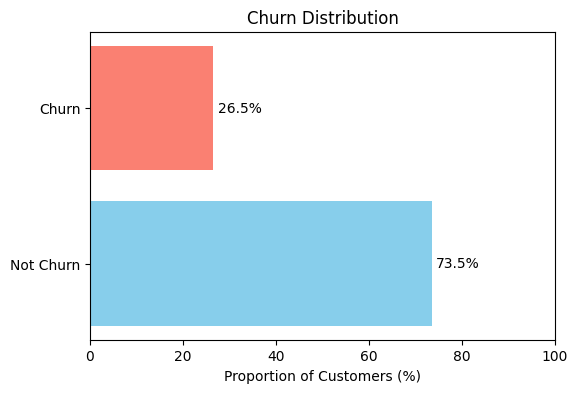

In [10]:
churn = df["Churn"].value_counts()
proportion = churn.values / churn.values.sum() * 100

plt.figure(figsize=(6, 4))
plt.barh(["Not Churn", "Churn"], proportion, color=["skyblue", "salmon"])
plt.xlabel("Proportion of Customers (%)")
plt.title("Churn Distribution")
for i, pct in enumerate(proportion):
    plt.text(pct + 1, i, f"{pct:.1f}%", va="center")
plt.xlim(0, 100)
plt.show()

#### Churn e Gênero

Buscamos entender se o gênero é um fator com grande influência na taxa de cancelamento. O gráfico de barras apresenta a distribuição do churn entre homens e mulheres em valores absolutos.

In [11]:
male = df.loc[df["gender"] == "Male", "Churn"].value_counts(normalize=False)
female = df.loc[df["gender"] == "Female", "Churn"].value_counts(normalize=False)

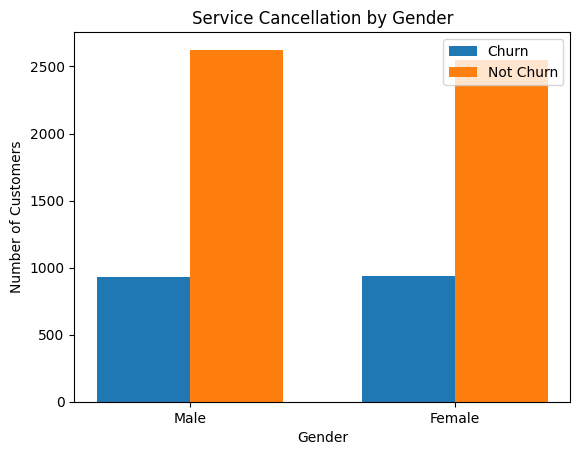

In [12]:
x = np.arange(2)
width = 0.35

plt.figure()
plt.bar(x - width/2, [male["Yes"], female["Yes"]], width, label="Churn")
plt.bar(x + width/2, [male["No"], female["No"]], width, label="Not Churn")

plt.xticks(x, ["Male", "Female"])
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.title('Service Cancellation by Gender')
plt.legend()

plt.show()


Observa-se que o número de mulheres e homens no dataset é balanceado, bem como a proporção de churn.

#### Ser idoso é um fator determinante?

A variável SeniorCitizen indica se o cliente é idoso (65 anos ou mais). Vale investigar se clientes idosos apresentam um comportamento diferente em relação ao cancelamento.

In [13]:
senior = df.loc[df["SeniorCitizen"] == 1, "Churn"].value_counts(normalize=False)
no_senior = df.loc[df["SeniorCitizen"] == 0, "Churn"].value_counts(normalize=False)

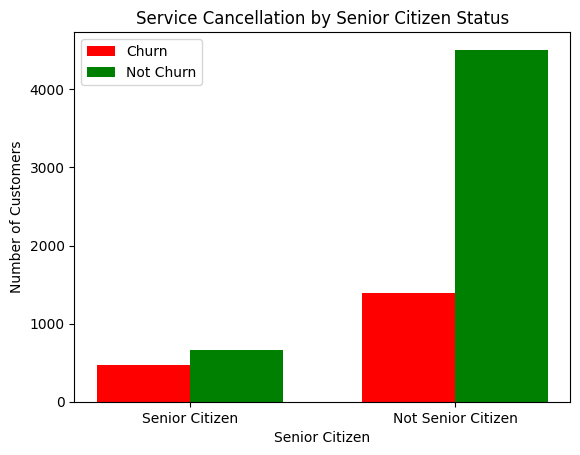

In [14]:
x = np.arange(2)
width = 0.35

plt.figure()
plt.bar(x - width/2, [senior["Yes"], no_senior["Yes"]], width, label="Churn", color='red')
plt.bar(x + width/2, [senior["No"], no_senior["No"]], width, label="Not Churn", color='green')

plt.xticks(x, ["Senior Citizen", "Not Senior Citizen"])
plt.ylabel('Number of Customers')
plt.xlabel('Senior Citizen')
plt.title('Service Cancellation by Senior Citizen Status')
plt.legend()
plt.show()

Ser idoso apresenta um impacto moderado no churn. Clientes identificados como idosos tendem a cancelar o serviço em uma proporção um pouco maior do que clientes não idosos.

#### Com parceiro ou sem?

A variável Partner indica se o cliente possui um parceiro(a). O objetivo deste gráfico é avaliar se ter ou não um parceiro está relacionado ao churn. A hipótese comum é que clientes que dividem despesas ou compartilham serviços com outra pessoa podem ter maior estabilidade e, portanto, menor propensão a cancelar.

In [15]:
partner = df.loc[df["Partner"] == "Yes", "Churn"].value_counts(normalize=False)
no_partner = df.loc[df["Partner"] == "No", "Churn"].value_counts(normalize=False)

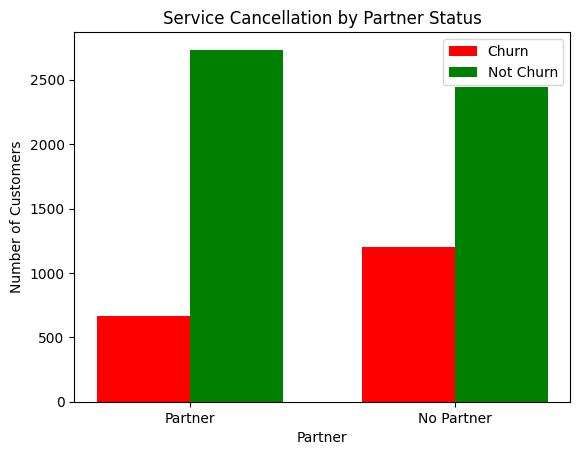

In [16]:
x = np.arange(2)
width = 0.35

plt.figure()
plt.bar(x - width/2, [partner["Yes"], no_partner["Yes"]], width, label="Churn", color='red')
plt.bar(x + width/2, [partner["No"], no_partner["No"]], width, label="Not Churn", color='green')

plt.xticks(x, ["Partner", "No Partner"])
plt.ylabel('Number of Customers')
plt.xlabel('Partner')
plt.title('Service Cancellation by Partner Status')
plt.legend()

plt.show()

Podemos perceber que clientes sem parceiros tendem a cancelar mais o serviço, o que corrobora com a hipótese prévia. 

#### Dependentes

Este gráfico busca verificar se a presença de dependentes está associada ao churn. A ideia é que clientes com responsabilidades familiares adicionais possam apresentar maior estabilidade no serviço, seja por necessidade de conectividade ou por menor propensão a mudanças.

In [17]:
dependents = df.loc[df["Dependents"] == "Yes", "Churn"].value_counts(normalize=False)
no_dependents = df.loc[df["Dependents"] == "No", "Churn"].value_counts(normalize=False)

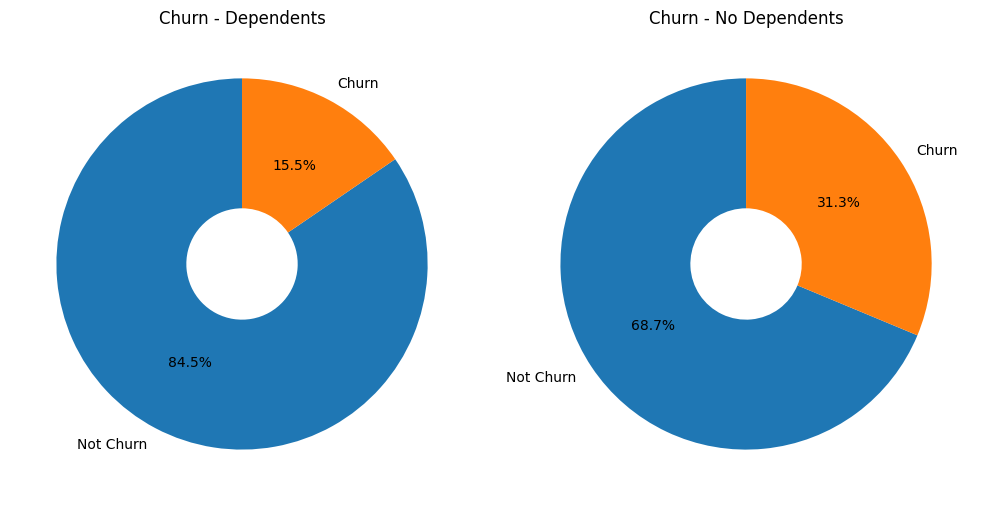

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(
    dependents,
    labels=["Not Churn", "Churn"],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}
)
axes[0].set_title('Churn - Dependents')

axes[1].pie(
    no_dependents,
    labels=["Not Churn", "Churn"],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}
)
axes[1].set_title('Churn - No Dependents')

plt.tight_layout()
plt.show()


Analisando os gráficos, percebe-se que, proporcionalmente, as pessoas que não possuem dependentes cancelam mais do que as que possuem dependentes.

#### Por mês ou anual?

Clientes podem escolher entre contratos mensais, anuais ou bienais. O objetivo deste gráfico é identificar como a duração do contrato influencia a probabilidade de cancelamento.

In [19]:
contract = (
    df.groupby("Contract")["Churn"]
    .value_counts()
    .unstack()
)

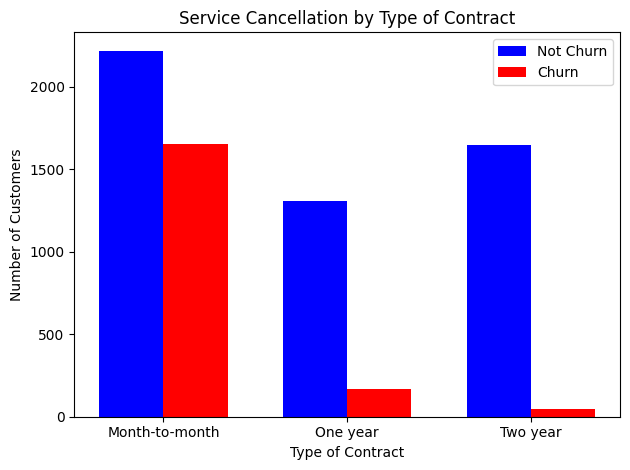

In [20]:
contract_labels = contract.index
no_churn = contract['No']
churn = contract['Yes']


x = np.arange(len(contract))
width = 0.35

plt.figure()
plt.bar(x - width/2, no_churn, width, label='Not Churn', color='blue')
plt.bar(x + width/2, churn, width, label='Churn', color='red')

plt.xticks(x, contract_labels)
plt.xlabel('Type of Contract')
plt.ylabel('Number of Customers')
plt.title('Service Cancellation by Type of Contract')
plt.legend()

plt.tight_layout()
plt.show()

Observa-se que clientes com contrato do tipo mensal apresentam um volume significativamente maior de churn quando comparados aos contratos anuais e bienais, evidenciando que a duração do contrato é um fator fortemente associado ao cancelamento. A hipótese é que contratos mais longos tendem a reduzir o churn, pois envolvem maior fidelização, descontos e menor flexibilidade de saída.

#### Físico ou digital?

A variável PaperlessBilling indica se o cliente recebe a fatura de forma digital ou impressa. O objetivo desta análise é verificar se a modalidade de cobrança influencia o churn.

In [21]:
paperless_billing = (
    df.groupby("PaperlessBilling")["Churn"]
    .value_counts()
    .unstack()
)

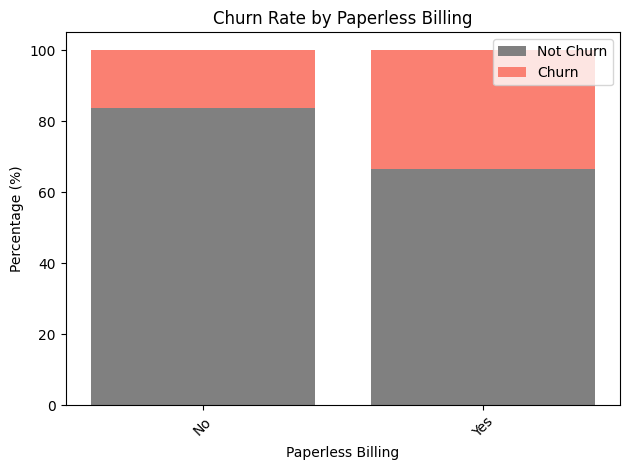

In [22]:
# Porcentagem de churn por método de pagamento
paperless_billing_pct = paperless_billing.div(paperless_billing.sum(axis=1), axis=0) * 100

plt.figure()

plt.bar(paperless_billing_pct.index, paperless_billing_pct["No"], label="Not Churn", color='gray')
plt.bar(
    paperless_billing_pct.index,
    paperless_billing_pct["Yes"],
    bottom=paperless_billing_pct["No"],
    label="Churn",
    color='salmon'
)

plt.xlabel("Paperless Billing")
plt.ylabel("Percentage (%)")
plt.title("Churn Rate by Paperless Billing")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



A variável PaperlessBilling mostra um padrão claro: clientes que adotam faturamento digital apresentam uma taxa de churn consideravelmente maior em comparação aos que recebem fatura física.

#### Métodos de Pagamento

O gráfico abaixo exibe a proporção entre os métodos de pagamento utilizados. Essa visualização ajuda a entender quais formas de pagamento são mais populares na base.

In [23]:
payment_method_labels = df["PaymentMethod"].unique()
payment_methods = df["PaymentMethod"].value_counts()

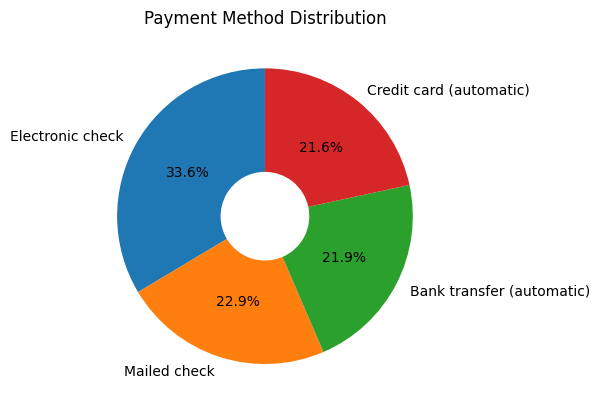

In [24]:
plt.figure()

plt.pie(
    payment_methods,
    labels=payment_method_labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.7}
)
plt.title('Payment Method Distribution')
plt.show()


O objetivo desta análise é verificar se o método de pagamento está associado a diferenças na taxa de churn. A hipótese é que métodos menos automatizados ou mais suscetíveis a inadimplência possam apresentar maior propensão ao cancelamento.

In [25]:
payment_churn = (
    df.groupby("PaymentMethod")["Churn"]
    .value_counts()
    .unstack()
)

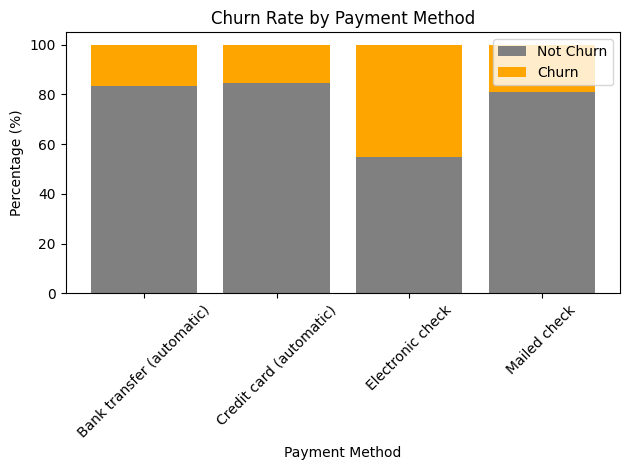

In [26]:
# Porcentagem de churn por método de pagamento
payment_pct = payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100

plt.figure()

plt.bar(payment_pct.index, payment_pct["No"], label="Not Churn", color='gray')
plt.bar(
    payment_pct.index,
    payment_pct["Yes"],
    bottom=payment_pct["No"],
    label="Churn",
    color='orange'
)

plt.xlabel("Payment Method")
plt.ylabel("Percentage (%)")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Clientes que utilizam métodos de pagamento automáticos apresentam maior retenção, enquanto o pagamento via electronic check está associado a maiores taxas de churn. Isso sugere que métodos de pagamento mais estáveis e automatizados contribuem para reduzir o churn.

#### Serviço de Internet

O serviço de internet é um dos principais, entender como ele se relaciona com a taxa de churn é importante para identificar insatisfações com o serviço oferecido. O gráfico abaixo mostra o número churn por serviço de internet.

In [27]:
internet_churn = (
    df.groupby("InternetService")["Churn"]
    .value_counts()
    .unstack()
)

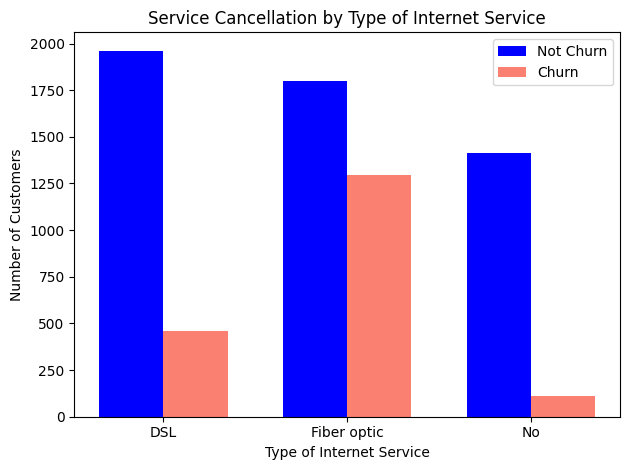

In [28]:
internet_labels = internet_churn.index
no_churn = internet_churn['No']
churn = internet_churn['Yes']

x = np.arange(len(internet_labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, no_churn, width, label='Not Churn', color='blue')
plt.bar(x + width/2, churn, width, label='Churn', color='salmon')

plt.xticks(x, internet_labels)
plt.xlabel('Type of Internet Service')
plt.ylabel('Number of Customers')
plt.title('Service Cancellation by Type of Internet Service')
plt.legend()

plt.tight_layout()
plt.show()

Pode-se perceber que a quantidade de cancelamentos é superior 

In [29]:
online_sec = (
    df.groupby("OnlineSecurity")["Churn"]
    .value_counts()
    .unstack()
)

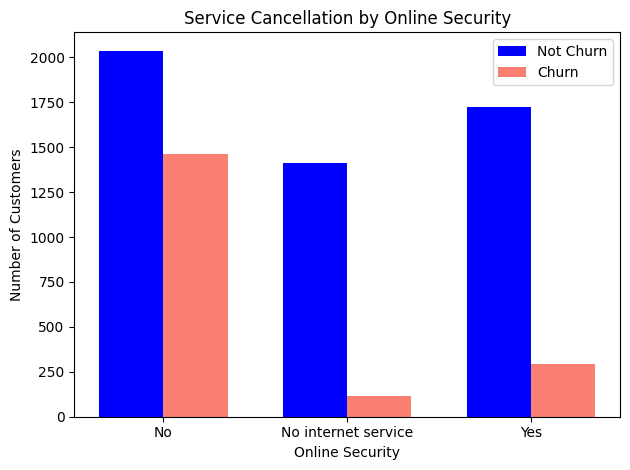

In [30]:
online_sec_labels = online_sec.index
no_churn = online_sec['No']
churn = online_sec['Yes']

x = np.arange(len(online_sec_labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, no_churn, width, label='Not Churn', color='blue')
plt.bar(x + width/2, churn, width, label='Churn', color='salmon')

plt.xticks(x, online_sec_labels)
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.title('Service Cancellation by Online Security')
plt.legend()

plt.tight_layout()
plt.show()

A análise do recurso OnlineSecurity revela uma diferença significativa nas taxas de churn. Clientes que não possuem segurança online apresentam uma taxa de cancelamento muito maior em comparação aos que possuem. Isso indica que serviços adicionais funcionam como um fator de retenção, reduzindo a probabilidade de churn. Observou-se que a variável TechSupport apresentava um padrão praticamente idêntico, motivo pelo qual apenas OnlineSecurity foi mantida na análise visual.

In [31]:
import seaborn as sns

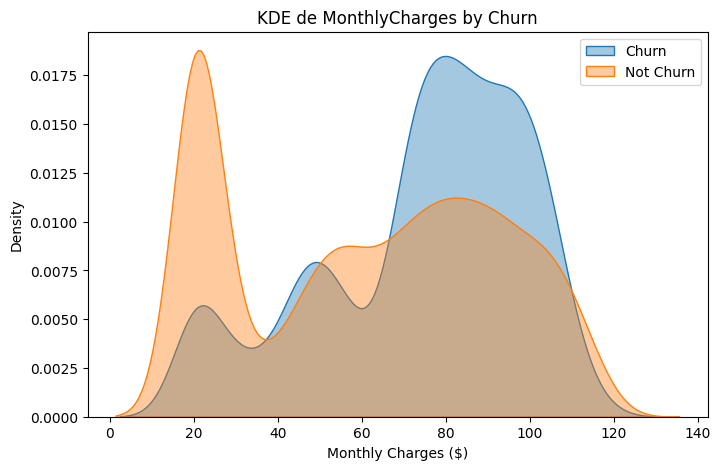

In [32]:

plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=df[df["Churn"] == "Yes"],
    x="MonthlyCharges",
    fill=True,
    alpha=0.4,
    label="Churn"
)

sns.kdeplot(
    data=df[df["Churn"] == "No"],
    x="MonthlyCharges",
    fill=True,
    alpha=0.4,
    label="Not Churn"
)

plt.title("KDE de MonthlyCharges by Churn")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.legend()
plt.show()

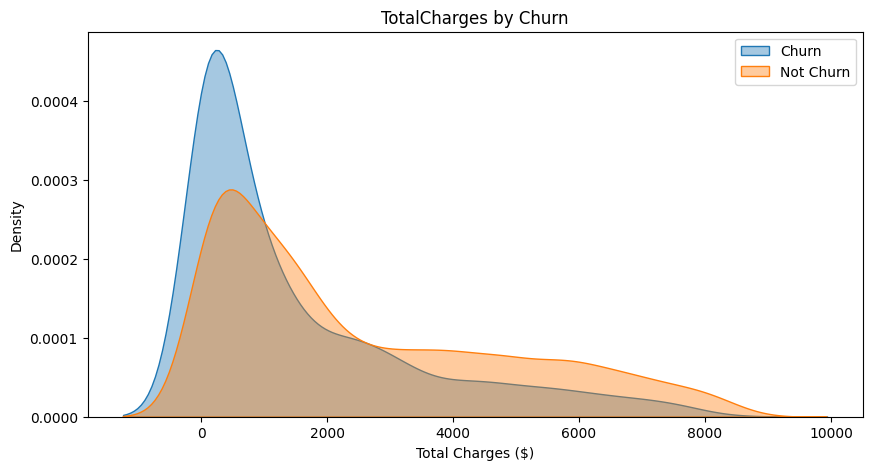

In [33]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    data=df[df["Churn"] == "Yes"],
    x="TotalCharges",
    fill=True,
    alpha=0.4,
    label="Churn"
)

sns.kdeplot(
    data=df[df["Churn"] == "No"],
    x="TotalCharges",
    fill=True,
    alpha=0.4,
    label="Not Churn"
)

plt.title("TotalCharges by Churn")
plt.xlabel("Total Charges ($)")
plt.ylabel("Density")
plt.legend()
plt.show()


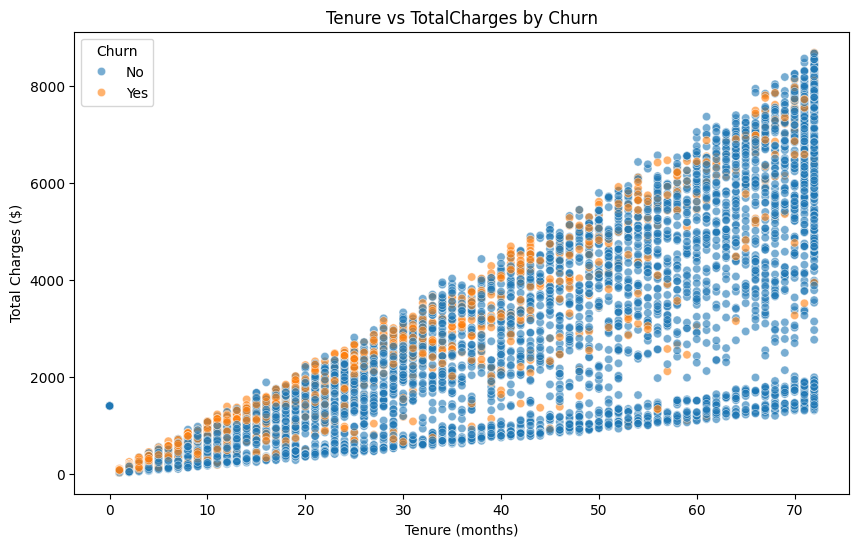

In [36]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="tenure",
    y="TotalCharges",
    hue="Churn",
    alpha=0.6
)

plt.title("Tenure vs TotalCharges by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges ($)")
plt.show()

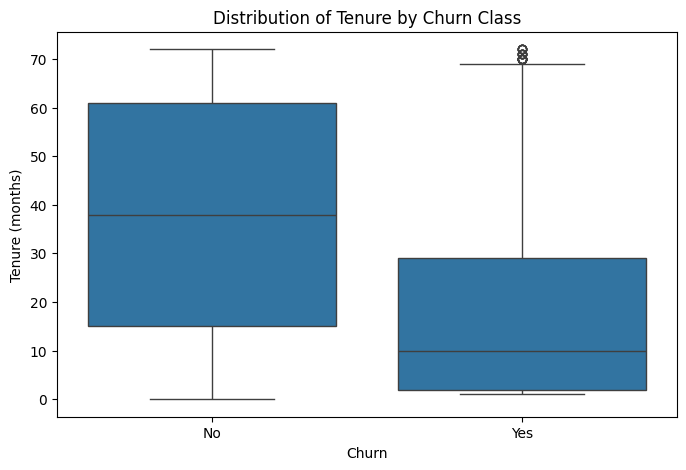

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn", y="tenure")

plt.title("Distribution of Tenure by Churn Class")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.show()

In [37]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

## Conclusões da Análise Exploratória

#### 1. Taxa de Churn

Na base de dados explorada, a taxa de churn encontrada foi de 23,5%, o que indica um nível significativo de cancelamentos. A maioria dos clientes segue com o contrato (73,5%), no entanto, uma análise detalhada dos fatores envolvidos é fundamental para compreender a alta taxa de churn.

#### 2. Tempo Médio de Cancelamento (Tenure)

Clientes que cancelam apresentam um tenure médio consideravelmente menor do que os clientes ativos, indicando que o churn ocorre principalmente nos primeiros meses de contrato. A distribuição mostrou que grande parte dos churners tem menos de 12 meses, enquanto clientes antigos raramente cancelam.

#### 3. Variáveis mais relacionadas ao churn

As variáveis com maior relação visual com o churn foram:

- Contract (contratos mensais apresentaram a maior taxa de churn)
- TechSupport/OnlineSecurity (clientes sem esses serviços cancelam mais)
- InternetService, especialmente Fiber Optic
- PaymentMethod, destacando Electronic Check
- MonthlyCharges, com valores mais altos associados a maior churn

Essas variáveis mostraram padrões claros e consistentes ao longo dos gráficos.

#### 4. Perfil do cliente que mais cancela

De maneira geral, o churn está fortemente associado a clientes recentes, com altos custos mensais e sem serviços de suporte adicionais. O tipo de contrato é um dos fatores mais determinantes, indicando que planos de longo prazo reduzem significativamente o risco de cancelamento. Esses achados podem orientar estratégias de retenção mais direcionadas.